# larcv2 Data Interface

In [1]:
import ROOT
from larcv import larcv
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

larcv.load_pyutil()


Welcome to JupyROOT 6.08/06


<ROOT.larcv::load_pyutil object at 0x5f4e430>

In [2]:
_files = ["/home/cadams/larcv-tutorial/proton.root", "/home/cadams/larcv-tutorial/electron.root"]

Let's start by opening the bare root file:

In [3]:
_f = ROOT.TFile(_files[0])
_f.ls()

TFile**		/home/cadams/larcv-tutorial/proton.root	
 TFile*		/home/cadams/larcv-tutorial/proton.root	
  KEY: TTree	image2d_wire_tree;1	wire tree
  KEY: TTree	chstatus_wire_tree;1	wire tree
  KEY: TTree	particle_mcst_tree;1	mcst tree
  KEY: TTree	cluster2d_keypt_tree;1	keypt tree
  KEY: TTree	cluster2d_mcst_tree;1	mcst tree
  KEY: TTree	cluster3d_mcst_tree;1	mcst tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


Let's check out image2d, since that's the basic data representation:

In [4]:
image_chain = ROOT.TChain("image2d_wire_tree")
truth_chain = ROOT.TChain("particle_mctruth_tree")

for _file in _files:
    image_chain.AddFile(_file)
    truth_chain.AddFile(_file)

In [10]:
#Get a random entry:
n_entries = image_chain.GetEntries()
rand_entry = numpy.random.choice(n_entries)
nbytes = image_chain.GetEntry(rand_entry)
nbytes = truth_chain.GetEntry(rand_entry)
image2d = image_chain.image2d_wire_branch
truth = truth_chain.particle_mctruth_branch


In [11]:
print truth.as_vector().front().pdg_code()
# 2212 is proton

11


This gives access to the 'EventImage2D' object, which is the collection of all image 2d for a particular run/subrun/event combo.  That's 3 images in this case.  We can get the array and draw the images with matplotlib:

_image_array has type <type 'numpy.ndarray'>
Image dimensions are (512, 512)
_image_array has type <type 'numpy.ndarray'>
Image dimensions are (512, 512)
_image_array has type <type 'numpy.ndarray'>
Image dimensions are (512, 512)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  after removing the cwd from sys.path.


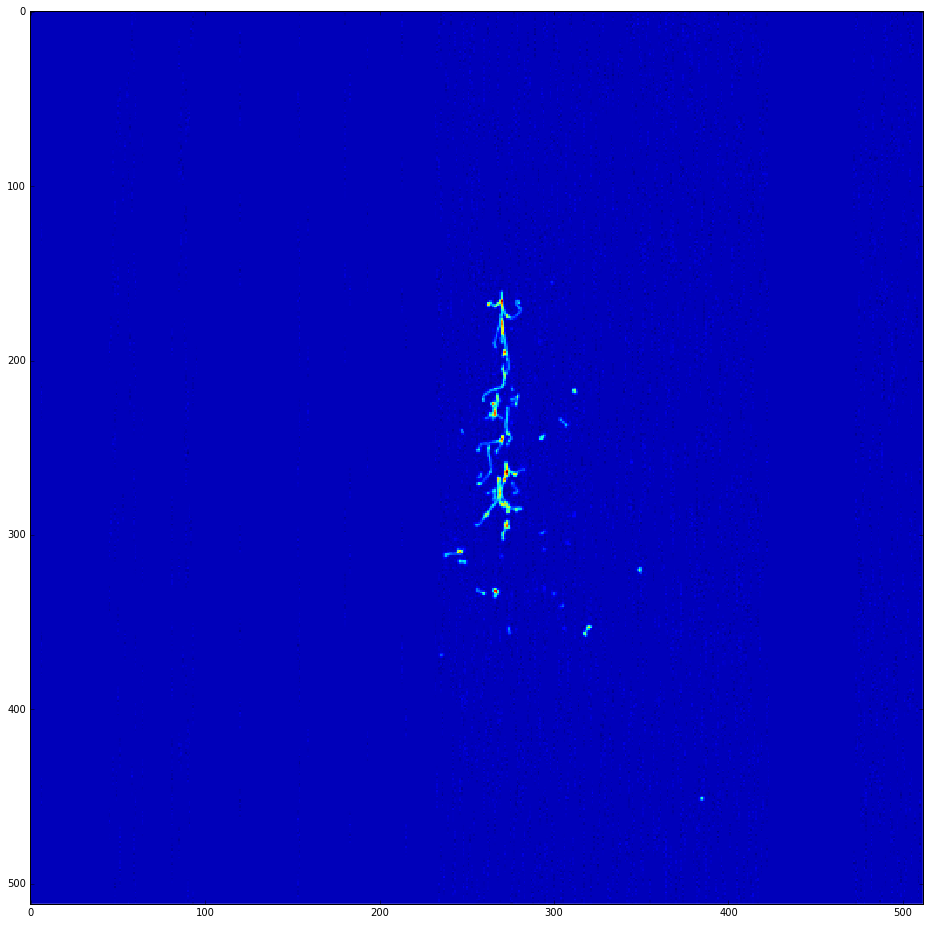

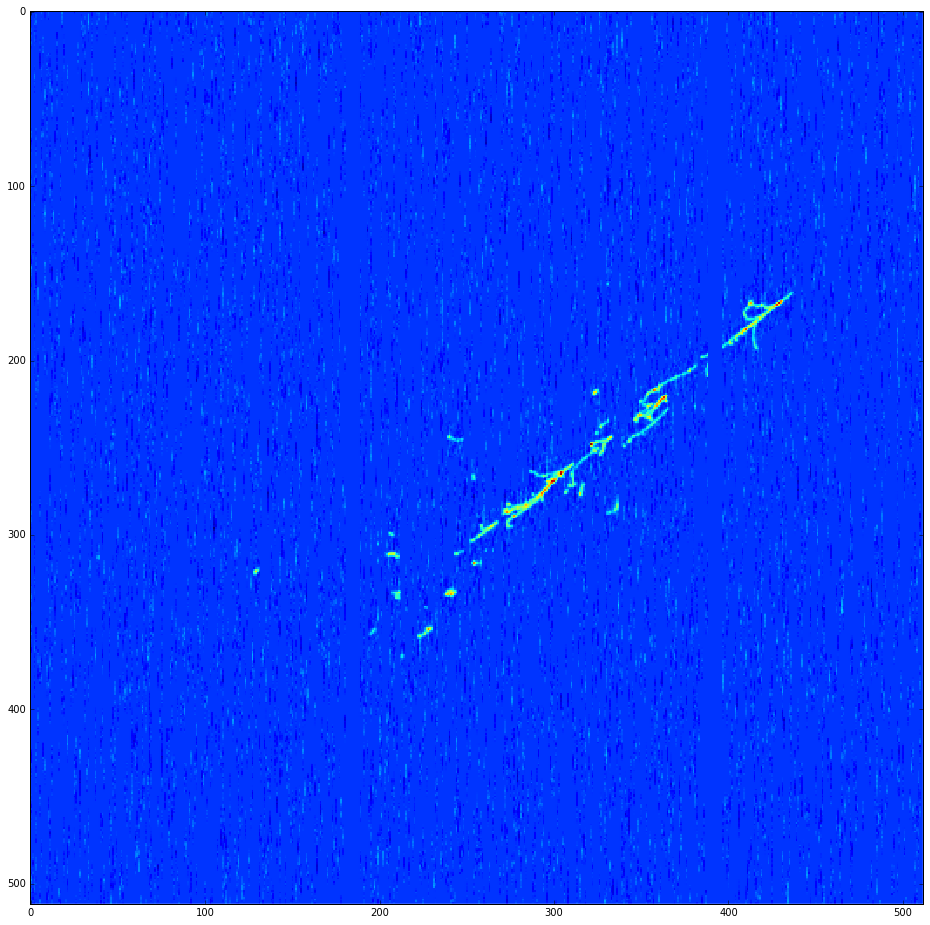

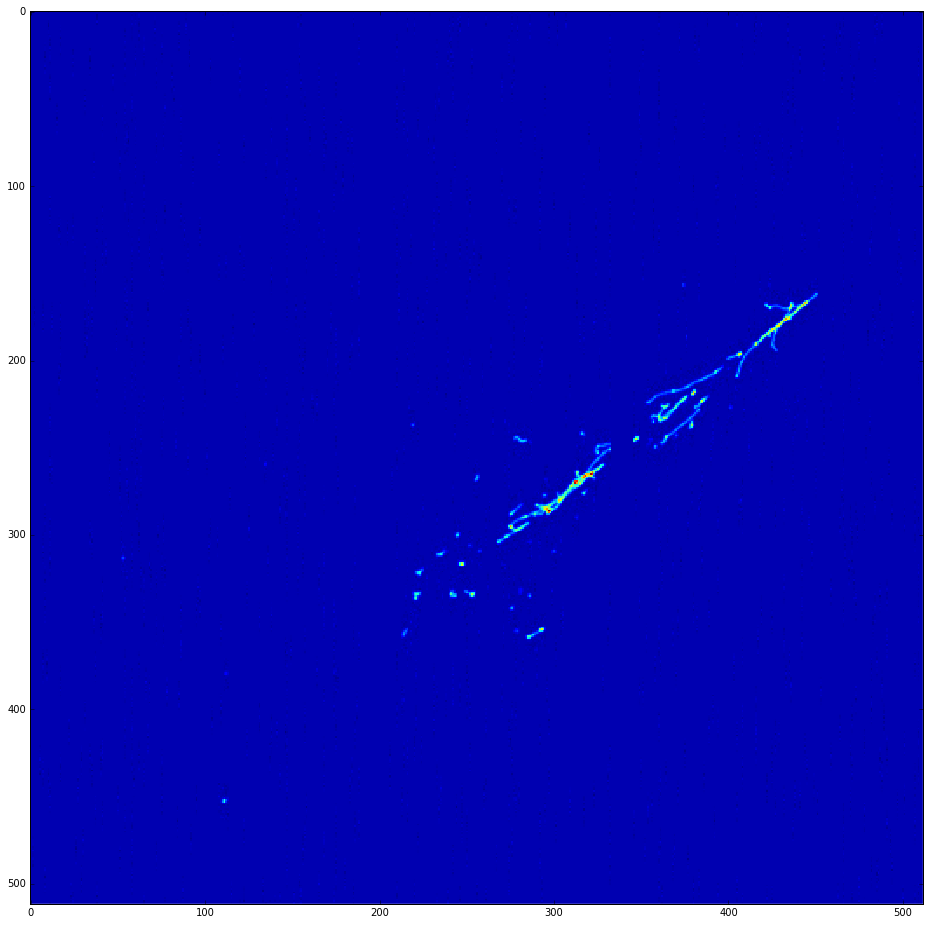

In [12]:
for image in image2d.image2d_array():
    # Note here that std::vectors in pyroot are iterable
    # larcv has a helper function to convert std::vector to numpy array, so we can use that:
    _image_array = larcv.as_ndarray(image)
    print "_image_array has type {}".format(type(_image_array))
    print "Image dimensions are {}".format(_image_array.shape)
    #Show the image with imshow:
    fig = plt.figure(figsize=(16,16))
    plt.imshow(_image_array.T, interpolation='none')

Looks like it's working.  We can (just for fun, here) zoom in on the region with the highest charge (take just one plane for this):

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  """Entry point for launching an IPython kernel.


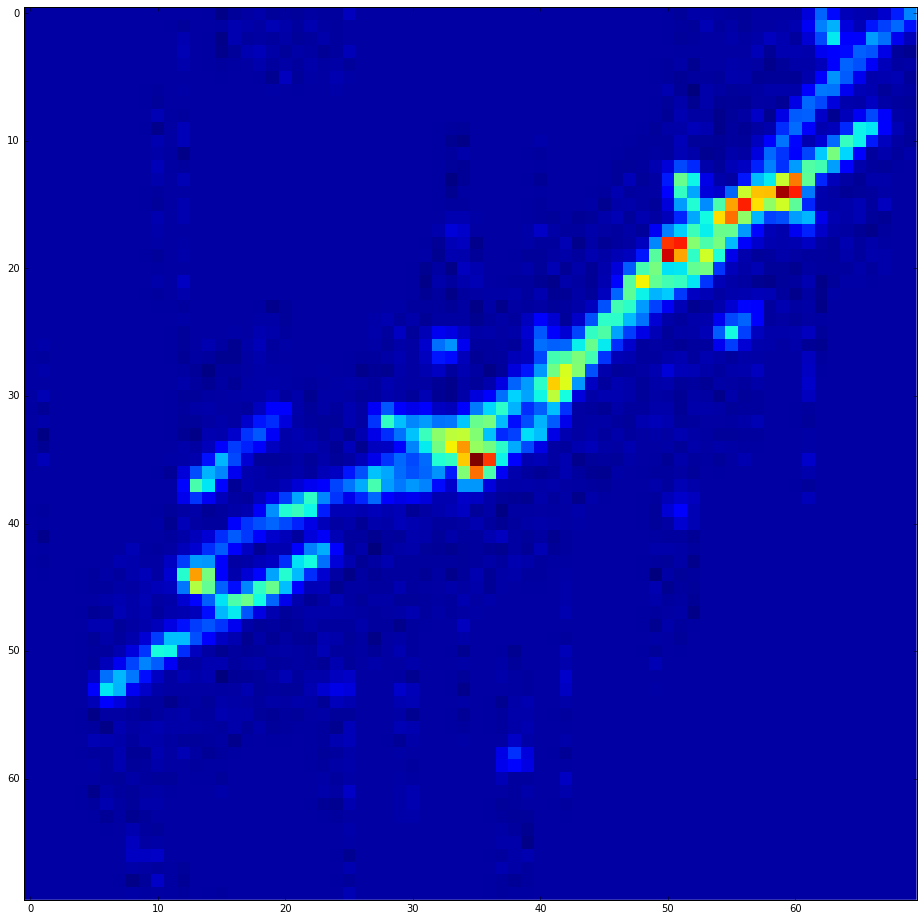

In [13]:
_collection_plane = larcv.as_ndarray(image2d.image2d_array()[2])
_x, _y = numpy.unravel_index(_collection_plane.argmax(), _collection_plane.shape)
crop_size=35
_zoom_image = _collection_plane[_x-crop_size:_x+crop_size, _y-crop_size:_y+crop_size]
fig = plt.figure(figsize=(16,16))
plt.imshow(_zoom_image.T, interpolation='none')

In this notebook, we saw we could open raw larcv root files and extract images and truth information.  In principle, this is enough for single particle training, but we can do better if we take advantage of everything larcv offers.